In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

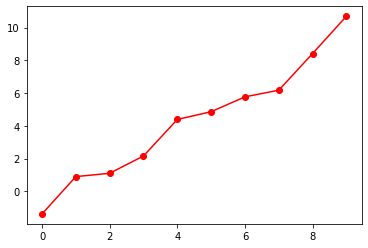

In [11]:
data = {
    'x':np.arange(10),
    'y':np.arange(10) + np.random.randn(10),
}
df = pd.DataFrame(data)
plt.plot(df['x'],df['y'],'ro-')

### Linear Regression, train with all data

In [18]:
model = LinearRegression()
model.fit(df[['x']],df['y'])
print('slope m =',model.coef_)
print('intercept c =',model.intercept_)

slope m = [1.1993944]
intercept c = -1.0859235463900205


In [25]:
df["y'all"] = model.predict(df[['x']])
df

,x,y,y'all
0,0,-1.376059,-1.085924
1,1,0.902988,0.113471
2,2,1.104525,1.312865
3,3,2.162218,2.512260
4,4,4.392650,3.711654
5,5,4.865771,4.911048
6,6,5.772748,6.110443
7,7,6.177792,7.309837
8,8,8.416252,8.509232
9,9,10.694628,9.708626


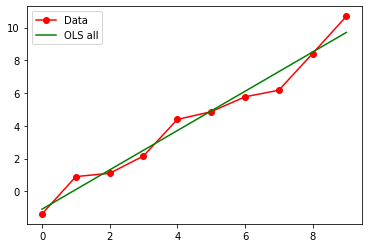

In [24]:
# ordinary least squares /nama lain linear regression
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'all"],'g-')
plt.legend(['Data','OLS all'])


<hr>

### Linear Regresion, train 80% random data

In [20]:
from sklearn.model_selection import train_test_split
# train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(df[['x']],df['y'],test_size=.2)
print(x_test)
print(y_test)
# print(x_train)

   x
8  8
5  5
8    8.416252
5    4.865771
Name: y, dtype: float64


In [28]:
model.fit(x_train,y_train)
df["y'80"] = model.predict(df[['x']])
df

,x,y,y'all,y'80
0,0,-1.376059,-1.085924,-1.093182
1,1,0.902988,0.113471,0.112347
2,2,1.104525,1.312865,1.317877
3,3,2.162218,2.512260,2.523407
4,4,4.392650,3.711654,3.728936
5,5,4.865771,4.911048,4.934466
6,6,5.772748,6.110443,6.139995
7,7,6.177792,7.309837,7.345525
8,8,8.416252,8.509232,8.551055
9,9,10.694628,9.708626,9.756584


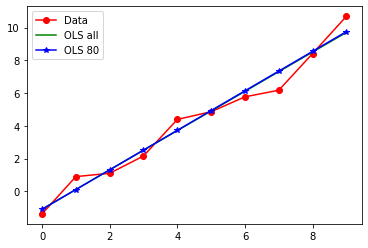

In [31]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'all"],'g-')
plt.plot(df['x'],df["y'80"],'b-*')
plt.legend(['Data','OLS all','OLS 80'])

<hr>

### Linear Regression, train 2 data

In [32]:
model.fit(df[['x']].iloc[:2],df['y'].iloc[:2])
df["y'2"] = model.predict(df[['x']])
df

,x,y,y'all,y'80,y'2
0,0,-1.376059,-1.085924,-1.093182,-1.376059
1,1,0.902988,0.113471,0.112347,0.902988
2,2,1.104525,1.312865,1.317877,3.182036
3,3,2.162218,2.512260,2.523407,5.461083
4,4,4.392650,3.711654,3.728936,7.740131
5,5,4.865771,4.911048,4.934466,10.019178
6,6,5.772748,6.110443,6.139995,12.298226
7,7,6.177792,7.309837,7.345525,14.577273
8,8,8.416252,8.509232,8.551055,16.856321
9,9,10.694628,9.708626,9.756584,19.135368


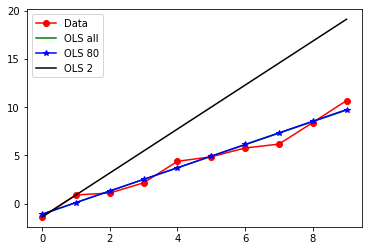

In [33]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'all"],'g-')
plt.plot(df['x'],df["y'80"],'b-*')
plt.plot(df['x'],df["y'2"],'k-')
plt.legend(['Data','OLS all','OLS 80','OLS 2'])

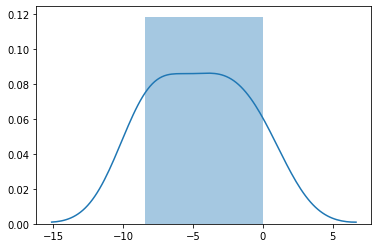

In [35]:
# plot residual / selisih antara y dengan y'
import seaborn as sb
sb.distplot((df['y'] - df["y'2"]))

<hr>

### Ridge Regression 

Sum Squared Error $ = \sum (y - \hat{y}) ^ 2 $

$ SSE = SSE\quad OLS + \lambda . m^2 $

Nilai penalty L2 Regularization $ + \lambda . m^2 $

In [39]:
from sklearn.linear_model import Ridge
modelR = Ridge(alpha=0.5)
modelR.fit(df[['x']].iloc[:2],df['y'].iloc[:2])
df["y'2ridge"] = modelR.predict(df[['x']])
df

,x,y,y'all,y'80,y'2,y'2ridge
0,0,-1.376059,-1.085924,-1.093182,-1.376059,-0.806297
1,1,0.902988,0.113471,0.112347,0.902988,0.333226
2,2,1.104525,1.312865,1.317877,3.182036,1.472750
3,3,2.162218,2.512260,2.523407,5.461083,2.612274
4,4,4.392650,3.711654,3.728936,7.740131,3.751798
5,5,4.865771,4.911048,4.934466,10.019178,4.891322
6,6,5.772748,6.110443,6.139995,12.298226,6.030845
7,7,6.177792,7.309837,7.345525,14.577273,7.170369
8,8,8.416252,8.509232,8.551055,16.856321,8.309893
9,9,10.694628,9.708626,9.756584,19.135368,9.449417


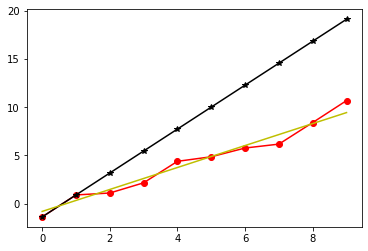

In [42]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'2"],'k-*')
plt.plot(df['x'],df["y'2ridge"],'y-')


<hr>

### LASSO Regression

(Least Absolute Shrinkage and Selection Operator)

Sum Absolute Error OLS $ = \sum |y - \hat{y}| $

SAE LASSO = SAE OLS $ + \lambda . |m| $

Nilai penalty L2 Regularization $ + \lambda . |m| $

In [48]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=0.3)
modelL.fit(df[['x']].iloc[:2],df['y'].iloc[:2])
df["y'2lasso"] = modelL.predict(df[['x']])
df

,x,y,y'all,y'80,y'2,y'2ridge,y'2lasso
0,0,-1.376059,-1.085924,-1.093182,-1.376059,-0.806297,-0.776059
1,1,0.902988,0.113471,0.112347,0.902988,0.333226,0.302988
2,2,1.104525,1.312865,1.317877,3.182036,1.472750,1.382036
3,3,2.162218,2.512260,2.523407,5.461083,2.612274,2.461083
4,4,4.392650,3.711654,3.728936,7.740131,3.751798,3.540131
5,5,4.865771,4.911048,4.934466,10.019178,4.891322,4.619178
6,6,5.772748,6.110443,6.139995,12.298226,6.030845,5.698226
7,7,6.177792,7.309837,7.345525,14.577273,7.170369,6.777273
8,8,8.416252,8.509232,8.551055,16.856321,8.309893,7.856321
9,9,10.694628,9.708626,9.756584,19.135368,9.449417,8.935368


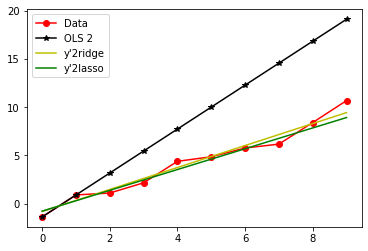

In [51]:
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'2"],'k-*')
plt.plot(df['x'],df["y'2ridge"],'y-')
plt.plot(df['x'],df["y'2lasso"],'g-')
plt.legend(['Data','OLS 2',"y'2ridge","y'2lasso"])

In [53]:
from sklearn.metrics import mean_squared_error
print('RMSE OLS 2', np.sqrt(mean_squared_error(df['y'],df["y'2"])))
print('RMSE Ridge 2', np.sqrt(mean_squared_error(df['y'],df["y'2ridge"])))
print('RMSE LASSO 2', np.sqrt(mean_squared_error(df['y'],df["y'2lasso"])))

RMSE OLS 2 5.55496016208591
RMSE Ridge 2 0.6334374470000963
RMSE LASSO 2 0.7380635753233151


<hr>

### Elastic_net Regression

Sum Squared Error OLS $ = \sum |y - \hat{y}| $

SSE EN = SSE OLS
$\displaystyle + \lambda_{ridge} . m^2 + \lambda_{lasso} . |m| $

Nilai penalty L1 + L2 Regularization $\displaystyle + \lambda_{ridge} . |m| + \lambda_{lasso} |m| $

In [60]:
from sklearn.linear_model import ElasticNet

modelE = ElasticNet(alpha=0.25)
modelE.fit(df[['x']].iloc[:2],df['y'].iloc[:2])
df["y'2elastic"] = modelE.predict(df[['x']])
df

,x,y,y'all,y'80,y'2,y'2ridge,y'2lasso,y'2elastic
0,0,-1.376059,-1.085924,-1.093182,-1.376059,-0.806297,-0.776059,-0.829551
1,1,0.902988,0.113471,0.112347,0.902988,0.333226,0.302988,0.356480
2,2,1.104525,1.312865,1.317877,3.182036,1.472750,1.382036,1.542512
3,3,2.162218,2.512260,2.523407,5.461083,2.612274,2.461083,2.728544
4,4,4.392650,3.711654,3.728936,7.740131,3.751798,3.540131,3.914575
5,5,4.865771,4.911048,4.934466,10.019178,4.891322,4.619178,5.100607
6,6,5.772748,6.110443,6.139995,12.298226,6.030845,5.698226,6.286639
7,7,6.177792,7.309837,7.345525,14.577273,7.170369,6.777273,7.472670
8,8,8.416252,8.509232,8.551055,16.856321,8.309893,7.856321,8.658702
9,9,10.694628,9.708626,9.756584,19.135368,9.449417,8.935368,9.844734


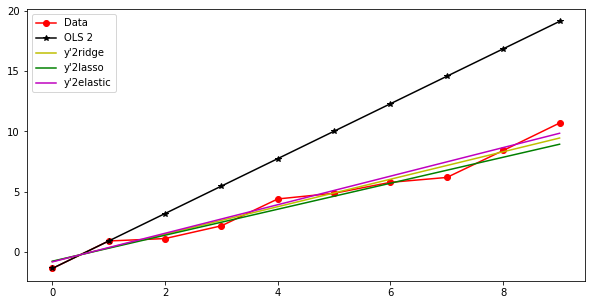

In [63]:
plt.figure(figsize=(10,5))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df["y'2"],'k-*')
plt.plot(df['x'],df["y'2ridge"],'y-')
plt.plot(df['x'],df["y'2lasso"],'g-')
plt.plot(df['x'],df["y'2elastic"],'m-')
plt.legend(['Data','OLS 2',"y'2ridge","y'2lasso","y'2elastic"])

<hr>


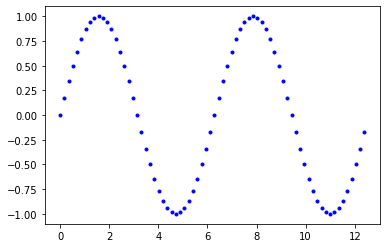

In [69]:
x = np.array([i * np.pi/180 for i in range (0,720,10)])
y = np.sin(x)
df2 = pd.DataFrame({'x':x, 'y':y}) 
df2
# df2.head()
plt.plot(df2['x'],df2['y'],'b.')

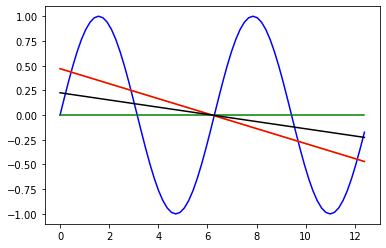

In [81]:
modelA = LinearRegression()
modelB = Ridge()
modelC = Lasso()
modelD = ElasticNet()

modelA.fit(df2[['x']],df2['y'])
modelB.fit(df2[['x']],df2['y'])
modelC.fit(df2[['x']],df2['y'])
modelD.fit(df2[['x']],df2['y'])

df2["y'A"] = modelA.predict(df2[['x']])
df2["y'B"] = modelB.predict(df2[['x']])
df2["y'C"] = modelC.predict(df2[['x']])
df2["y'D"] = modelD.predict(df2[['x']])

plt.plot(df2['x'],df2['y'],'b-')
plt.plot(df2['x'],df2["y'A"],'y-')
plt.plot(df2['x'],df2["y'B"],'r-')
plt.plot(df2['x'],df2["y'C"],'g-')
plt.plot(df2['x'],df2["y'D"],'k-')


In [78]:
modelR1 = Ridge(alpha=0.5)
modelR1.fit(df2[['x']].iloc[:2],df2['y'].iloc[:2])
df2["y'2ridge"] = modelR1.predict(df2[['x']])

model.fit(df2[['x']].iloc[:2],df2['y'].iloc[:2])
df2["y'2"] = model.predict(df2[['x']])

modelL1 = Lasso(alpha=0.3)
modelL1.fit(df2[['x']].iloc[:2],df2['y'].iloc[:2])
df2["y'2lasso"] = modelL1.predict(df2[['x']])

modelE1 = ElasticNet(alpha=0.25)
modelE1.fit(df2[['x']].iloc[:2],df2['y'].iloc[:2])
df2["y'2elastic"] = modelE1.predict(df2[['x']])


df2

,x,y,y'2ridge,y'2,y'2lasso,y'2elastic
0,0.000000,0.000000,0.084257,-1.387779e-17,0.086824,0.086824
1,0.174533,0.173648,0.089391,1.736482e-01,0.086824,0.086824
2,0.349066,0.342020,0.094524,3.472964e-01,0.086824,0.086824
3,0.523599,0.500000,0.099657,5.209445e-01,0.086824,0.086824
4,0.698132,0.642788,0.104790,6.945927e-01,0.086824,0.086824
...,...,...,...,...,...,...
67,11.693706,-0.766044,0.428186,1.163443e+01,0.086824,0.086824
68,11.868239,-0.642788,0.433319,1.180808e+01,0.086824,0.086824
69,12.042772,-0.500000,0.438452,1.198172e+01,0.086824,0.086824
70,12.217305,-0.342020,0.443586,1.215537e+01,0.086824,0.086824


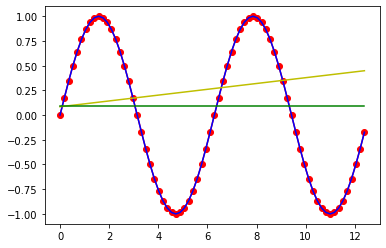

In [77]:
plt.plot(df2['x'],df2['y'],'ro-')
plt.plot(df2['x'],df2['y'],'b-')
plt.plot(df2['x'],df2["y'2ridge"],'y-')
plt.plot(df2['x'],df2["y'2lasso"],'g-')



<hr>

### Polynomial Regression

In [88]:
x = np.array([i * np.pi/180 for i in range (0,720,10)])
y = np.sin(x)
df3 = pd.DataFrame({'x':x, 'y':y}) 
for i in range(2,11):
    df3[f'x{i}'] = df3['x'] ** i
df3

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.174533,0.173648,0.030462,0.005317,0.000928,0.000162,2.826599e-05,4.933346e-06,8.610313e-07,1.502783e-07,2.622851e-08
2,0.349066,0.342020,0.121847,0.042533,0.014847,0.005182,1.809023e-03,6.314683e-04,2.204240e-04,7.694250e-05,2.685800e-05
3,0.523599,0.500000,0.274156,0.143548,0.075161,0.039354,2.060591e-02,1.078923e-02,5.649226e-03,2.957928e-03,1.548767e-03
4,0.698132,0.642788,0.487388,0.340261,0.237547,0.165839,1.157775e-01,8.082794e-02,5.642855e-02,3.939456e-02,2.750259e-02
...,...,...,...,...,...,...,...,...,...,...,...
67,11.693706,-0.766044,136.742760,1599.029628,18698.582342,218655.724306,2.556896e+06,2.989959e+07,3.496370e+08,4.088552e+09,4.781033e+10
68,11.868239,-0.642788,140.855095,1671.701919,19840.157762,235467.732401,2.794587e+06,3.316683e+07,3.936319e+08,4.671717e+09,5.544505e+10
69,12.042772,-0.500000,145.028354,1746.543372,21033.223336,253298.309675,3.050414e+06,3.673544e+07,4.423965e+08,5.327680e+09,6.416003e+10
70,12.217305,-0.342020,149.262536,1823.585888,22279.304562,272193.053766,3.325465e+06,4.062823e+07,4.963674e+08,6.064272e+09,7.408906e+10


In [91]:
model = LinearRegression()
xn = ['x']
xn.extend(['x%d' %i for i in range(2,11)])
model.fit(df3[xn],df3['y'])
df3["y'"] = model.predict(df3[xn])
df3

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,y'
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.006864
1,0.174533,0.173648,0.030462,0.005317,0.000928,0.000162,2.826599e-05,4.933346e-06,8.610313e-07,1.502783e-07,2.622851e-08,0.179246
2,0.349066,0.342020,0.121847,0.042533,0.014847,0.005182,1.809023e-03,6.314683e-04,2.204240e-04,7.694250e-05,2.685800e-05,0.348880
3,0.523599,0.500000,0.274156,0.143548,0.075161,0.039354,2.060591e-02,1.078923e-02,5.649226e-03,2.957928e-03,1.548767e-03,0.503434
4,0.698132,0.642788,0.487388,0.340261,0.237547,0.165839,1.157775e-01,8.082794e-02,5.642855e-02,3.939456e-02,2.750259e-02,0.641931
...,...,...,...,...,...,...,...,...,...,...,...,...
67,11.693706,-0.766044,136.742760,1599.029628,18698.582342,218655.724306,2.556896e+06,2.989959e+07,3.496370e+08,4.088552e+09,4.781033e+10,-0.765006
68,11.868239,-0.642788,140.855095,1671.701919,19840.157762,235467.732401,2.794587e+06,3.316683e+07,3.936319e+08,4.671717e+09,5.544505e+10,-0.646263
69,12.042772,-0.500000,145.028354,1746.543372,21033.223336,253298.309675,3.050414e+06,3.673544e+07,4.423965e+08,5.327680e+09,6.416003e+10,-0.507160
70,12.217305,-0.342020,149.262536,1823.585888,22279.304562,272193.053766,3.325465e+06,4.062823e+07,4.963674e+08,6.064272e+09,7.408906e+10,-0.347969


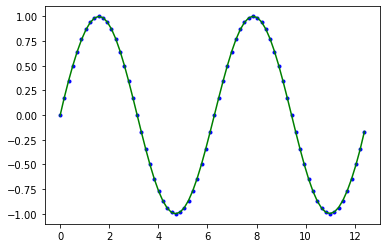

In [92]:
plt.plot(df3['x'],df3['y'],'b.')
plt.plot(df3['x'],df3["y'"],'g-')